<a href="https://colab.research.google.com/github/Akmalfauzi/uas-kriptografi-steganografi/blob/main/UAS_KRIPTOGRAFI_DAN_STEGANOGRAFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================================
# NAMA            : AKMAL FAUZI
# NIM             : 230401010160
# KELAS           : IF 502
# MATA KULIAH     : Kriptografi dan Steganografi
# PRODI           : S1 PJJ Informatika
# ==========================================================

import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt

In [ ]:
def text_to_bits(text):
    """Mengubah teks menjadi aliran bit biner."""
    return ''.join(format(ord(char), '08b') for char in text)

def bits_to_text(bits):
    """Mengubah biner kembali menjadi teks."""
    chars = [chr(int(bits[i:i+8], 2)) for i in range(0, len(bits), 8)]
    return "".join(chars)

In [ ]:
def sembunyikan_pesan(nama_file_input, pesan):
    img = iio.imread(nama_file_input)
    stego_data = np.array(img, copy=True, dtype=np.uint8)
    flat_img = stego_data.flatten()

    bit_pesan = text_to_bits(pesan)

    # Inti LSB: Mengganti bit terakhir dengan bit pesan
    for i in range(len(bit_pesan)):
        flat_img[i] = (flat_img[i] & 254) | int(bit_pesan[i])

    return flat_img.reshape(img.shape)

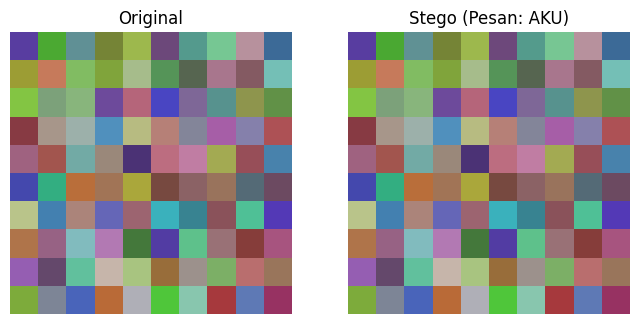

In [ ]:
# 1. Buat gambar percobaan
img_test = np.random.randint(50, 200, (10, 10, 3), dtype=np.uint8)
iio.imwrite('cover.png', img_test)

# 2. Jalankan Steganografi
stego_result = sembunyikan_pesan('cover.png', "AKU")

# 3. Tampilkan Hasil (Matplotlib)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.title("Original"); plt.imshow(img_test); plt.axis('off')
plt.subplot(1, 2, 2); plt.title("Stego (Pesan: AKU)"); plt.imshow(stego_result); plt.axis('off')
plt.show()